In [1]:
import pandas as pd 
import numpy as np
import to_en
import undummy_df
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
% matplotlib inline 

In [2]:
color = 'lightblue'

In [3]:
#1
en_df = to_en.get_en_df('income_train.csv')
#en_df = to_en.get_en_df('income_test.csv')

In [4]:
#2
df = en_df.copy()
df = undummy_df.undummy_df(df)

In [5]:
#3 drop due to many Nan, and id (non-feature)
df.drop(['rent_payment', 'years_behind_school', 'id'], axis = 1, inplace = True)

In [6]:
#4
df.info()
print('Target {}' .format(df.Target.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 52 columns):
overcrowding_by_bedrooms         9557 non-null int64
rooms                            9557 non-null int64
overcrowding_by_rooms            9557 non-null int64
bathroom                         9557 non-null int64
refrigerator                     9557 non-null int64
num_tablets                      2215 non-null float64
males_under_12                   9557 non-null int64
males_over_12                    9557 non-null int64
num_males                        9557 non-null int64
females_under_12                 9557 non-null int64
females_over_12                  9557 non-null int64
num_females                      9557 non-null int64
persons_under_12                 9557 non-null int64
persons_over_12                  9557 non-null int64
num_persons                      9557 non-null int64
size_household                   9557 non-null int64
number_persons_household         9557 non-n

In [7]:
df.describe()

,overcrowding_by_bedrooms,rooms,overcrowding_by_rooms,bathroom,refrigerator,num_tablets,males_under_12,males_over_12,num_males,females_under_12,...,num_over_65,mean_edu_adults,num_bedrooms,overcrowding_persons_per_room,computer,tv,num_mobile_phones,urban,age,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,1.404063,0.385895,1.559171,1.945066,0.399184,...,0.284085,9.231523,2.739981,1.605380,0.102124,0.284608,2.821492,0.714555,34.303547,3.302292
std,0.191417,1.468381,0.151957,0.072145,0.201459,0.763131,0.680779,1.036574,1.188852,0.692460,...,0.597163,4.167694,0.944507,0.819946,0.302827,0.451251,1.483249,0.451650,21.612261,1.009565
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,6.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,17.000000,3.000000
50%,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,9.000000,3.000000,1.500000,0.000000,0.000000,3.000000,1.000000,31.000000,4.000000
75%,0.000000,6.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,...,0.000000,11.600000,3.000000,2.000000,0.000000,1.000000,4.000000,1.000000,51.000000,4.000000
max,1.000000,11.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,8.000000,6.000000,...,3.000000,37.000000,8.000000,6.000000,1.000000,1.000000,10.000000,1.000000,97.000000,4.000000


In [8]:
#5 later exploration uncovered empty strings, handled later
df[df.columns.values].isnull().sum()

overcrowding_by_bedrooms            0
rooms                               0
overcrowding_by_rooms               0
bathroom                            0
refrigerator                        0
num_tablets                      7342
males_under_12                      0
males_over_12                       0
num_males                           0
females_under_12                    0
females_over_12                     0
num_females                         0
persons_under_12                    0
persons_over_12                     0
num_persons                         0
size_household                      0
number_persons_household            0
years_school                        0
ceiling                             0
disable_person                      0
female                              0
under_10                            0
household_id                        0
num_minors                          0
num_adults                          0
num_over_65                         0
calc_depende

In [9]:
#5 replace nan with zero
df.num_tablets.fillna(0, inplace = True)
df = df.reindex()

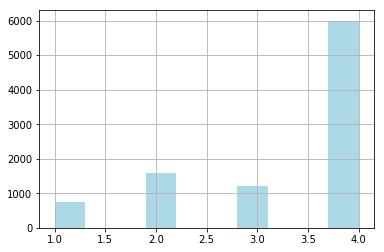

In [10]:
#6 strong bias to 4
df.Target.hist(color = color);

In [27]:
df.query('household_id == "52123171a"')[['relation', 'disable_person', 'num_persons']]

,relation,disable_person,num_persons
126,son/daughter,0,4
127,spouse/partner,0,4
128,household_head,1,4
129,father/mother_inlaw,1,4


In [22]:
df.query('disable_person == 1 and num_persons > 3')['household_id' ]

128     52123171a
129     52123171a
155     347058ce6
163     28ec0c747
278     0473832dd
354     bf1d89cb8
381     b0e5fd9b2
439     4476ccd4c
444     4476ccd4c
463     6f1edad4e
489     135334d8e
490     135334d8e
635     fd10905bc
670     e8725f7cb
693     cd0157ab9
694     cd0157ab9
1001    52cf8fe9d
1021    f55c4fc94
1228    0f2682fe6
1233    b110e9c10
1319    340e71ea8
1335    64d356343
1344    64595839e
1437    c1d6b909a
1492    fd2369f80
1494    fd2369f80
1541    59e971916
1566    be3124b4e
1640    d66a81ad1
1719    b6b9d2b71
          ...    
8410    a3674a3ee
8493    28893b5e7
8494    28893b5e7
8495    43bfddbd2
8546    94b615f8a
8588    89f42958a
8595    a869d0192
8598    a869d0192
8626    dd8a4bfcb
8659    764424047
8743    e235f37d4
8755    06ca88023
8825    536c8befb
8868    0c7de4f5c
8885    eb48e2a2b
8961    2b42b5570
8979    f09e635c1
9004    666a9b79f
9200    f90ed7a26
9245    f5f3c8c37
9337    673c6db37
9344    b0ee52f47
9394    c05652653
9433    0966c7521
9454    2c

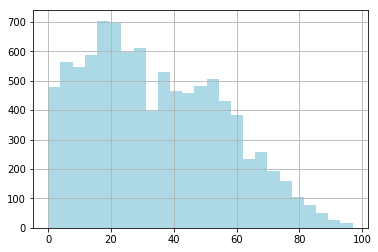

In [127]:
df.age.hist(color = color, bins = 25);

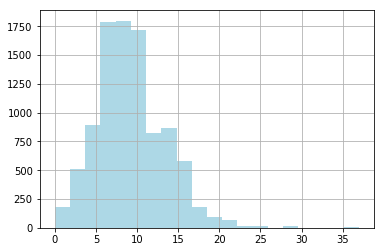

In [128]:
df.mean_edu_adults.hist(color = color, bins = 20);

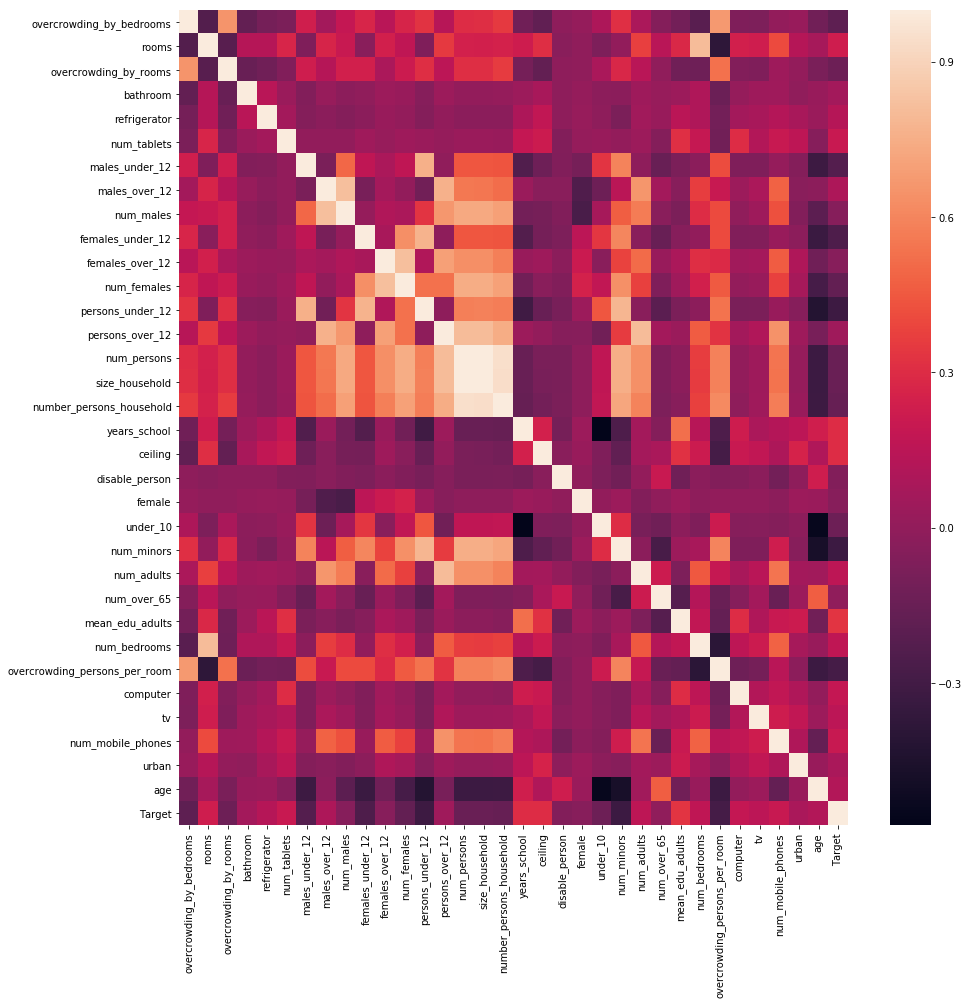

In [129]:
#7
plt.figure(figsize = (15,15))
corr = df.corr()
sn.heatmap(corr);

In [130]:
#8
unique_id = df.household_id.unique()
def del_no_hh(h_id):
    count = 0
    hh_idx = []
    for u in h_id:
        t_df = df.query('household_id == "{}"' .format(u))[['relation', 'rooms', 'household_id']]#, 'Target']]
        if ('household_head' not in t_df.relation.values):
            t_value = t_df.index.values
            df.drop(t_value,inplace = True)
            hh_idx.append(t_value)
            count += 1
    return count, hh_idx
count, t_idx = del_no_hh(unique_id)

In [131]:
#9
#set poverty level to household head level
unique_id = df.household_id.unique()
def set_hh_poverty(h_id):
    for i in h_id:
        t_df = df.query('household_id == "{}"' .format(i))[['relation', 'rooms', 'household_id', 'Target']]
        if np.std(t_df.Target) != 0:
            t_idx = t_df.index
            target = t_df.query('relation == "household_head"')['Target'].values[0]
            df.loc[t_idx, 'Target'] = target
set_hh_poverty(unique_id)

In [132]:
#10
#fill mean_edu_adults with mean of mean_edu_adults
df.mean_edu_adults.fillna(df.mean_edu_adults.mean(), inplace = True)

In [133]:
#11
#locate empty education, find edu mode by age
edu_idx = df.query('education == ""')['age'].index
for i in edu_idx:
    age = df.loc[i]['age']
    edu_mode = df.query('age == {}' .format(age))['education'].mode()
    print(i, edu_mode[0])

(1476, 'complete_primary')
(1481, 'complete_primary')
(6728, 'incomplete_primary')


In [134]:
#11a
#hardcode missing edu values from above with age edu-mode
df.loc[6728, 'education'] = 'incomplete_primary'

In [135]:
#12
#fill '' roof_material with metal
print(df.roof_material.value_counts())
df.roof_material = ['metal' if r == '' else r for r in df.roof_material]
print(df.roof_material.value_counts())

metal                  9248
fiber_cement            169
                         66
natural_fibers_roof      30
other_roof               21
Name: roof_material, dtype: int64
metal                  9314
fiber_cement            169
natural_fibers_roof      30
other_roof               21
Name: roof_material, dtype: int64


In [136]:
#13
#fill '' elec_provider with public
print(df.elec_provider.value_counts())
df.elec_provider = ['public' if r == '' else r for r in df.elec_provider]
print(df.elec_provider.value_counts())

public              8439
cooperative         1056
none_electricity      21
                      15
private_plant          3
Name: elec_provider, dtype: int64
public              8454
cooperative         1056
none_electricity      21
private_plant          3
Name: elec_provider, dtype: int64


In [137]:
#14
#drop repetitive data, data that doesnt help model
df.drop(['size_household', 'number_persons_household', 'household_id', 'marital_status',
         'relation', 'education', 'calc_dependency'], axis = 1, inplace = True)

In [138]:
#15
#calculate new dependency
df['new_calc_dep'] = (df.num_over_65 + df.persons_under_12)/ df.num_persons

In [139]:
#16
#encode conditions, create overall conditions, drop ind conditions
le =  LabelEncoder()
df.wall_condition = le.fit_transform(df.wall_condition)
df.floor_condition = le.fit_transform(df.floor_condition)
df.roof_condition = le.fit_transform(df.roof_condition)
df['overall_condition'] = (df.wall_condition + df.roof_condition + df.floor_condition) / 3
df.drop(['wall_condition', 'roof_condition', 'floor_condition'], axis = 1, inplace = True)

In [30]:
#17
#dummy categorical variables
df = pd.get_dummies(df, prefix = ['roof_material', 'elec_provider', 'wall_material', 'house_ownership',
                             'region', 'water_supply', 'cooking_supply',
                             'floor_material', 'sewage', 'thrash_disposal'], columns = ['roof_material','elec_provider', 'wall_material', 'house_ownership',
                             'region', 'water_supply', 'cooking_supply',
                             'floor_material', 'sewage', 'thrash_disposal'])

In [31]:
df.to_csv('clean_income.csv', index = False)